The following cell contains all the import statements you'll require to complete this

In [2]:
import pyspectral
import pysolar
from corrections import rayleighcorr as rayc
from corrections import resolutioncorr as resc
from netCDF4 import Dataset
import numpy as np
from matplotlib import pyplot as plt

The following cell contains the base path for the netCDF files with the data from the satellite as well as a single file's filename, and finally a complete file path for that file

In [4]:
path='AWSCut/L1_RADF/'
#Reading in Channel 1 Data (1 km resolution)
filename1='OR_ABI-L1b-RadF-M3C01_G16_s20172491300352_e20172491311119_c20172491311197.nc'
file1= path+ 'Channel01/'+ filename1

In the following cell, create a dataset from the channel 1 file using Dataset(file1,'r') then access the variables for Latitude, Longitude and Rad values and store the results

In [5]:
satdatch1= Dataset(file1,'r')
satdatch1lat=satdatch1.variables['Latitude'][:]  #geolocation latitude
satdatch1lon=satdatch1.variables['Longitude'][:] #geolocation longitude
satdatch1rad=satdatch1.variables['Rad'][:] #measured value of channel

In the following cell, repeat the above step, but this time replace channel 1 with the channel 2 data. The second filename has been provided as a variable, filename2

In [6]:
filename2='OR_ABI-L1b-RadF-M3C02_G16_s20172491300352_e20172491311119_c20172491311194.nc'
file2=path+'Channel02/'+filename2
satdatch2=Dataset(file2,'r')
satdatch2lat=satdatch2.variables['Latitude'][:]
satdatch2lon=satdatch2.variables['Longitude'][:]
satdatch2rad=satdatch2.variables['Rad'][:]

Decrease the resolution of the Channel 2 scenes from 0.5km to 1km using the resolutioncorrection (with the alias resc) function in corrections.py
Store the resulting adjusted latitudes,longitudes, and radiation values. Depending on your machine, this can take a little bit of time, so ensure it has completed before running the next cell

In [8]:
satdatch2lat,satdatch2lon,satdatch2rad=resc(satdatch2lat,satdatch2lon,satdatch2rad) #correcting for resolution

Read in the channel 3 data, and create a dataset then  access the variables for Latitude, Longitude and Rad values and store the results. The name for the channel 3 file has been provided

In [9]:
filename3='OR_ABI-L1b-RadF-M3C03_G16_s20172491300352_e20172491311119_c20172491311197.nc'
file3=path+'Channel03/'+filename3
satdatch3=Dataset(file3,'r')
satdatch3lat=satdatch3.variables['Latitude'][:]
satdatch3lon=satdatch3.variables['Longitude'][:]
satdatch3rad=satdatch3.variables['Rad'][:]       

Apply the atmospheric and Rayleigh correction using the rayleighcorrection function (alias rayc) from the corrections.py file. 
The structure is as follows, where rrc is a variable to store the returned red rayleigh corrected values, grc for the green, and brc for the blue
rrc, grc, brc = rayc(filename of channel1, latitude array of channel 1, longitude array of channel 1, latitude array of channel 2, longitude array of channel 2, channel 1 radiation array, channel 2 radiation array, channel 3 radiation array)

In [10]:
RRC,GRC,BRC=rayc(filename1,satdatch1lat,satdatch1lon,satdatch2lat,satdatch2lon,satdatch1rad,satdatch2rad,satdatch3rad)#Apply rayleigh correction that returns three values i.e rayleigh correction for red, blue and green channels

No rsr file /home/osoro/.local/share/pyspectral/rsr_abi_GOES-16.h5 on disk
3364248it [00:02, 1372312.54it/s]


Set up an image variable using the numpy method zeros with a height 700, width 1000, and 3 channels
Next, normalise the red green and blue values (rrc, grc and brc from the previous step) and combine them into the image constructed. It looks like image[]=rrc[:,:]/rrc.max() for the red channel 

In [14]:
image=np.zeros((700,1000,3))#create a blank image
#look at values on each of the channels and they are from 0 to 2. Hence make sure by normalizing. make sure value is between 0 and 1
image[:,:,0]=RRC[:,:]/RRC.max()
image[:,:,1]=GRC[:,:]/GRC.max()
image[:,:,2]=BRC[:,:]/BRC.max()



Finally, use the imshow function from pyplot and pass in the image variable from above, this will show you the image. Be patient, it can take a little time. You can also save the image by using the savefig method of pyplot.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


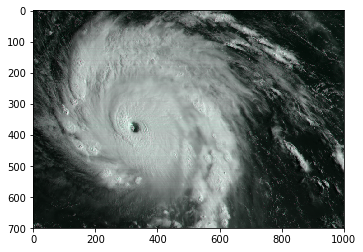

In [17]:
plt.imshow(image)
plt.savefig('First Hurricane Image')